## Импорт

In [8]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from classification.MNIST.getdata import get_data
from classification.MNIST.vis import plot_digit, plot_digits, save_fig
from models.Model import DataAlg

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


## Получение данных и инициализация переменных

In [2]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning



## Linear regression using the Normal Equation
$y = 4+3X+e$

In [7]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
(X.shape, y.shape)

((100, 1), (100, 1))

[0, 2, 0, 15]

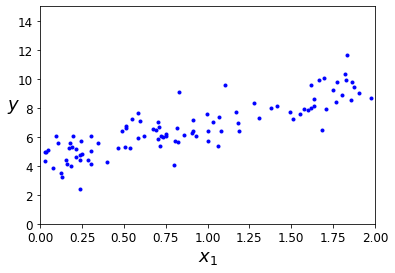

In [9]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])

In [15]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
X_b[:3]

array([[1.        , 1.63796279],
       [1.        , 1.27531895],
       [1.        , 0.70151434]])

In [16]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.3335141 ],
       [2.60555371]])

In [20]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)

X_new, X_new_b, y_predict

(array([[0],
        [2]]),
 array([[1., 0.],
        [1., 2.]]),
 array([[4.3335141 ],
        [9.54462152]]))

[0, 2, 0, 15]

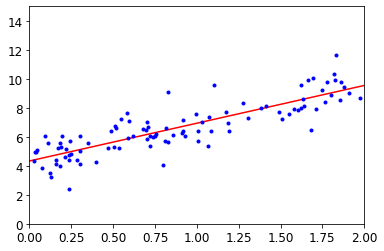

In [19]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])

In [24]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
print(lin_reg)
lin_reg.fit(X, y)
lin_reg.intercept_,   lin_reg.coef_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


(array([4.3335141]), array([[2.60555371]]))

In [25]:
lin_reg.predict(X_new)

array([[4.3335141 ],
       [9.54462152]])

#### Класс LinearRegression основан на функции scipy.linalg.lstsq () (название означает «наименьшие квадраты»), которую вы можете вызвать напрямую:

In [26]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd, residuals, rank, s

(array([[4.3335141 ],
        [2.60555371]]),
 array([87.88105052]),
 2,
 array([13.9160595 ,  4.26303286]))


## Обучение


## Визуализация